## HW؟-Clustering


### Kmeans:

In this question, the goal is to implement the k-means algorithm. You are not allowed to use any ready-made Python libraries for this purpose. This implementation should be used to solve the following questions. The k-means algorithm must run until the cluster centers no longer change.

In [1]:
#import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


#### Part 1:

Utilize the subsequent cell in order to create the Dataset. Afterwards, try to execute the algorithm with k=2 centroids. At Kmeans, it is recommended to execute the algorithm with several various starting states in order to eventually choose the best respective result.

In [2]:
# create the Dataset
X,Y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=45)

## KMeans Implementation

In [3]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit(self, X):
        random_idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iter):
            
            clusters = self._assign_clusters(X)

        
            new_centroids = self._update_centroids(X, clusters)

            
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        clusters = []
        for x in X:
            distances = [np.linalg.norm(x - centroid) for centroid in self.centroids]
            cluster_idx = np.argmin(distances)
            clusters.append(cluster_idx)
        return np.array(clusters)

    def _update_centroids(self, X, clusters):
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = X[clusters == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                
                new_centroid = self.centroids[i]
            new_centroids.append(new_centroid)
        return np.array(new_centroids)

    def predict(self, X):
        return self._assign_clusters(X)


kmeans = KMeans(n_clusters=2, max_iter=100)  
kmeans.fit(X)  

### Display the changes in cost:
Plot the results in a line chart where the horizontal axis represents the run number of the algorithm and the vertical axis represents the cost (error). The chart should show the changes in cost over the 20 different runs.

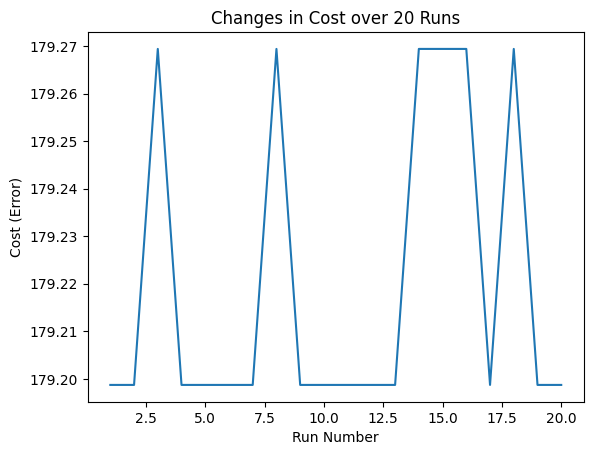

In [4]:
kmeans=KMeans()
def calculate_cost(X, centroids, clusters):
    cost = 0
    for i, x in enumerate(X):
        centroid = centroids[clusters[i]]
        cost += np.linalg.norm(x - centroid) ** 2
    return cost

costs = []
for i in range(20):
    kmeans = KMeans(n_clusters=2, max_iter=100)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    cost = calculate_cost(X, kmeans.centroids, clusters)
    costs.append(cost)

# Display changes in cost
plt.plot(range(1, 21), costs)
plt.xlabel("Run Number")
plt.ylabel("Cost (Error)")
plt.title("Changes in Cost over 20 Runs")
plt.show()

#### Part 2:

Use the cell below to create a new dataset. Then try to run the mentioned algorithm on the new dataset and finally visualize the final results (there is no problem to use the relevant Python libraries like `matplotlib`). Consider two clusters for this part.

In [5]:
X, Y = make_classification(n_samples=700, n_features=2, n_informative=2, n_redundant=0, n_classes=2)

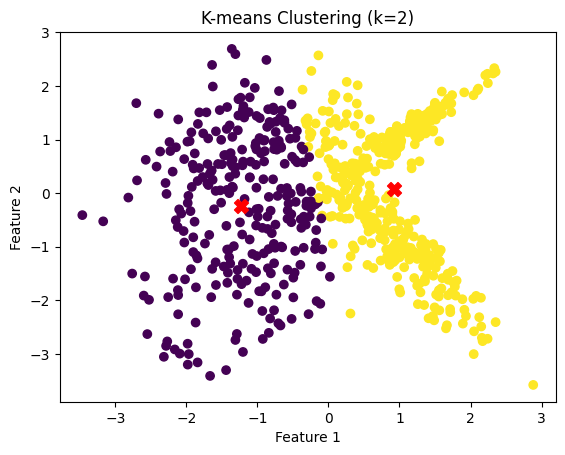

In [6]:
#visualization the Result
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.centroids

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-means Clustering (k=2)")
plt.show()